# Character-Level Recurrent Neural Network (RNN)
__[Reference Link from stanford university](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)__<br>
__[Reference Link from Amazon](https://aws.amazon.com/what-is/recurrent-neural-network/)__<br>
__[Reference Link from IBM](https://www.ibm.com/topics/recurrent-neural-networks/)__<br>
__[Reference Link from PyTorch](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)__<br>

1. Input: Sequential data (words, sentences, or time-series data)
2. Output: Sequential data (words, sentences, or time-series data)
3. Can be used to language translation, natural language processing (nlp), speech recognition, and image captioning, etc.

# Classification

In [19]:
# Example of Vanilla RNN
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.scaler.com/topics/images/unfolding-recurrent-neural-network.webp", width=600, height=600)

## 0. Prepare data
Classifying Names with a Character-Level RNN

In [20]:
# Download and save data
import os
from pathlib import Path
import requests
import shutil

DATA_ZIP = "data.zip"
data_path = os.path.join('data', 'names')
DATA_PATH = Path(data_path)
data_zip_file = os.path.join("data", DATA_ZIP)
if not DATA_PATH.exists():
    DATA_PATH.mkdir(parents=True, exist_ok=True)
    print("Downloading " + DATA_ZIP)
    request = requests.get("https://download.pytorch.org/tutorial/" + DATA_ZIP)
    with open(data_zip_file, "wb") as f:
        f.write(request.content)

    print("Unzip " + DATA_ZIP)
    shutil.unpack_archive(data_zip_file, ".")

print("Testing data:")
print(os.listdir(data_path))

Testing data:
['Arabic.txt', 'Chinese.txt', 'Czech.txt', 'Dutch.txt', 'English.txt', 'French.txt', 'German.txt', 'Greek.txt', 'Irish.txt', 'Italian.txt', 'Japanese.txt', 'Korean.txt', 'Polish.txt', 'Portuguese.txt', 'Russian.txt', 'Scottish.txt', 'Spanish.txt', 'Vietnamese.txt']


In [21]:
# Convert to python unicode
from unidecode import unidecode
import glob
import string

all_letters = string.ascii_letters + " .,;'-$"
n_letters = len(all_letters)

category_lines = {}
all_categories = []

import unicodedata
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in glob.glob(os.path.join(data_path, '*.txt')):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

In [22]:
# Show sample data
import pandas as pd
datalines = []
dataframe = {}
samples = []
print(f"Total categories: {n_categories}")
for item in all_categories:
    datalines.append(len(category_lines[item]))
    samples.append(category_lines[item][:5])
dataframe["Category"] = all_categories
dataframe["Number"] = datalines
dataframe["Sample"] = samples
pd.DataFrame(dataframe)

Total categories: 18


,Category,Number,Sample
0,Arabic,2000,"[Khoury, Nahas, Daher, Gerges, Nazari]"
1,Chinese,268,"[Ang, Au-Yong, Bai, Ban, Bao]"
2,Czech,519,"[Abl, Adsit, Ajdrna, Alt, Antonowitsch]"
3,Dutch,297,"[Aalsburg, Aalst, Aarle, Achteren, Achthoven]"
4,English,3668,"[Abbas, Abbey, Abbott, Abdi, Abel]"
5,French,277,"[Abel, Abraham, Adam, Albert, Allard]"
6,German,724,"[Abbing, Abel, Abeln, Abt, Achilles]"
7,Greek,203,"[Adamidis, Adamou, Agelakos, Akrivopoulos, Ale..."
8,Irish,232,"[Adam, Ahearn, Aodh, Aodha, Aonghuis]"
9,Italian,709,"[Abandonato, Abatangelo, Abatantuono, Abate, A..."


In [23]:
# Data to Tensor
import torch

letterIdx = {}
for idx, letter in enumerate(all_letters):
    letterIdx[letter] = idx

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for idx, letter in enumerate(line):
        tensor[idx][0][letterIdx[letter]] = 1

    return tensor
test = lineToTensor("Test")
print(test)
print(test.shape)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

## 1. Create RNN Model

In [24]:
import torch.nn as nn
import torch.nn.functional as F

class RNN_CLASSIFICATION(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn_model_class = RNN_CLASSIFICATION(n_letters, n_hidden, n_categories)

In [25]:
# test the model
hidden = rnn_model_class.initHidden()

output, next_hidden = rnn_model_class(test, hidden)
print(output.shape, next_hidden.shape)

torch.Size([4, 1, 18]) torch.Size([4, 1, 128])


In [26]:
import random

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

catIdx = {}
for idx, cat in enumerate(all_categories):
    catIdx[cat] = idx

def randomChoice(array):
    return array[random.randint(0, len(array) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([catIdx[category]], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

print(randomTrainingExample())

('Arabic', 'Boulos', tensor([0]), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

**Each loop of training will:**<br> 
* Create input and target tensors<br>
* Create a zeroed initial hidden state<br>
* Read each letter in and<br>
* Keep hidden state for next letter<br>
* Compare final output to target<br>
* Back-propagate<br>
* Return the output and loss<br>

In [27]:
# Loss function
loss_fn = nn.NLLLoss()

# Train step
learning_rate = 0.005 

# each train step train one line
def train_step(category_tensor, line_tensor, model):
    hidden = model.initHidden()

    model.zero_grad()

    # each character in this line
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)

    loss = loss_fn(output, category_tensor)
    loss.backward()

    # Update gradient 
    for p in model.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [28]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %02ds' % (m, s)

start = time.time()

# Keep track of losses for plotting
current_loss = 0
all_losses = []
def train_class(model, current_loss, all_losses):
    for iter in range(1, n_iters + 1):
        category, line, category_tensor, line_tensor = randomTrainingExample()
        output, loss = train_step(category_tensor, line_tensor, model)
        current_loss += loss
    
        # Print ``iter`` number, loss, name and guess
        if iter % print_every == 0:
            guess, guess_i = categoryFromOutput(output)
            correct = '✓' if guess == category else '✗ (%s)' % category
            print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
    
        # Add current loss avg to list of losses
        if iter % plot_every == 0:
            all_losses.append(current_loss / plot_every)
            current_loss = 0

train_class(rnn_model_class, current_loss, all_losses)

5000 5% (0m 13s) 1.9457 Le / Chinese ✗ (Vietnamese)
10000 10% (0m 25s) 2.2915 Sanchez / Spanish ✓
15000 15% (0m 38s) 3.7308 Manus / Portuguese ✗ (Irish)
20000 20% (0m 51s) 3.2193 Fleming / Italian ✗ (Scottish)
25000 25% (1m 04s) 4.4837 Graham / Arabic ✗ (Scottish)
30000 30% (1m 17s) 2.1590 Habich / Irish ✗ (German)
35000 35% (1m 30s) 1.1848 Abulmambetoff / Russian ✓
40000 40% (1m 44s) 1.7842 Mooney / French ✗ (Irish)
45000 45% (1m 57s) 1.5440 Selmone / French ✗ (Italian)
50000 50% (2m 10s) 1.7554 Merle / Scottish ✗ (French)
55000 55% (2m 23s) 0.9026 Ilyushin / Russian ✓
60000 60% (2m 37s) 2.5475 Tsoumada / Japanese ✗ (Greek)
65000 65% (2m 50s) 1.3071 Simoes / Portuguese ✓
70000 70% (3m 04s) 5.2737 Altena / Italian ✗ (Dutch)
75000 75% (3m 17s) 0.0109 Esikov / Russian ✓
80000 80% (3m 30s) 0.8088 Dziedzic / Polish ✓
85000 85% (3m 43s) 0.0971 Komatsuzaki / Japanese ✓
90000 90% (3m 57s) 1.0711 Bartosz / Polish ✓
95000 95% (4m 11s) 0.0538 De santigo / Portuguese ✓
100000 100% (4m 23s) 0.9606

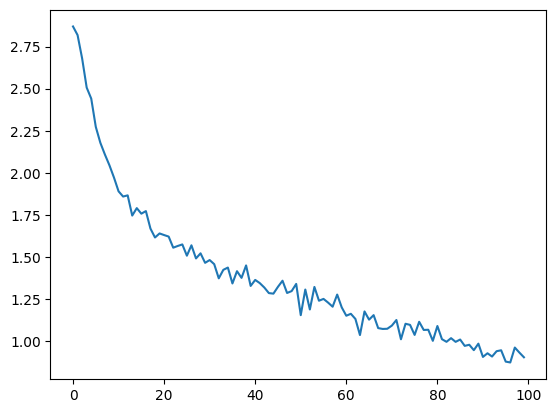

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

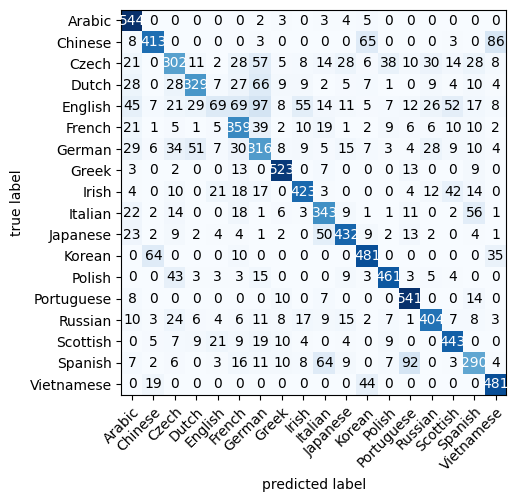

In [30]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting.plot_confusion_matrix import plot_confusion_matrix

n_confusion = 10000

def evaluate(line_tensor, model):
    hidden = model.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)
    return output

y_pred = []
y_true = []
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor, rnn_model_class)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    y_pred.append(guess_i)
    y_true.append(category_i)

y_pred_tensor = torch.Tensor(y_pred)
y_true_tensor = torch.Tensor(y_true)
confmat = ConfusionMatrix(num_classes=len(all_categories), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=y_true_tensor)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=all_categories,
    figsize=(8,5)
)

In [31]:
# Train more times
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

start = time.time()

# Train more
train_class(rnn_model_class, current_loss, all_losses)

5000 5% (0m 13s) 0.6425 Brian / Irish ✓
10000 10% (0m 26s) 0.0126 Hyobanshi / Japanese ✓
15000 15% (0m 39s) 0.2226 Miao / Chinese ✓
20000 20% (0m 52s) 0.9100 Diarmaid / Irish ✓
25000 25% (1m 05s) 0.1750 Vandroogenbroeck / Dutch ✓
30000 30% (1m 18s) 0.0297 Do / Vietnamese ✓
35000 35% (1m 31s) 0.1338 Krytinar / Czech ✓
40000 40% (1m 44s) 2.1575 Rey / French ✗ (Spanish)
45000 45% (1m 58s) 0.5461 an / Vietnamese ✓
50000 50% (2m 11s) 0.2740 Bandoni / Italian ✓
55000 55% (2m 24s) 0.0151 Bishara / Arabic ✓
60000 60% (2m 37s) 0.6611 Maly / Polish ✓
65000 65% (2m 51s) 0.0846 Abasolo / Spanish ✓
70000 70% (3m 03s) 2.2545 Klein / Czech ✗ (English)
75000 75% (3m 16s) 0.4298 De la fontaine / French ✓
80000 80% (3m 29s) 0.2777 Asch / Dutch ✓
85000 85% (3m 42s) 0.0615 Gordon / Scottish ✓
90000 90% (3m 55s) 0.4016 Campbell / Scottish ✓
95000 95% (4m 09s) 0.0580 Mo / Korean ✓
100000 100% (4m 21s) 2.2298 Boesch / Irish ✗ (German)


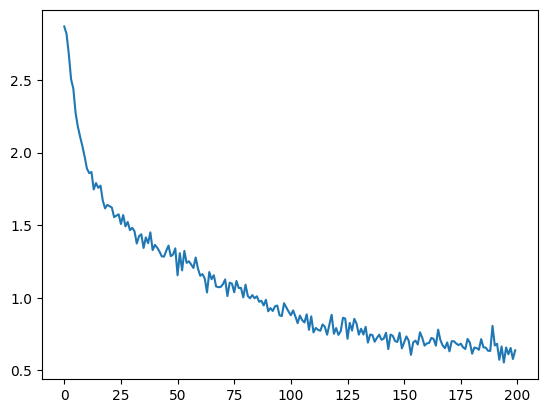

In [32]:
plt.figure()
plt.plot(all_losses)

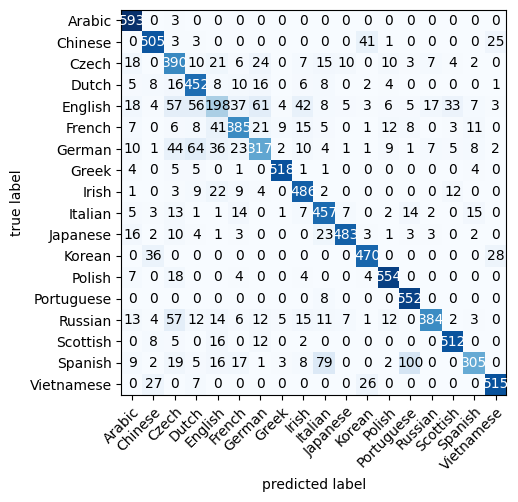

In [33]:
n_confusion = 10000

def evaluate(line_tensor, model):
    hidden = model.initHidden()
    for i in range(line_tensor.size()[0]):
        output, hidden = model(line_tensor[i], hidden)
    return output

y_pred = []
y_true = []
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor, rnn_model_class)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    y_pred.append(guess_i)
    y_true.append(category_i)

y_pred_tensor = torch.Tensor(y_pred)
y_true_tensor = torch.Tensor(y_true)
confmat = ConfusionMatrix(num_classes=len(all_categories), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=y_true_tensor)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=all_categories,
    figsize=(8,5)
)

# Generation

In [34]:
class RNN_GENERATION(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [35]:
rnn_model_gen = RNN_GENERATION(n_letters, 128, n_letters)

In [36]:
category, input, hidden = torch.randint(0, 1, (1, n_categories)),  test[0], rnn_model_gen.initHidden()
combined = torch.cat((category, input, hidden), 1)
print(category.shape, input.shape, hidden.shape)
print(combined.shape)
print(rnn_model_gen(category, input, hidden))

torch.Size([1, 18]) torch.Size([1, 59]) torch.Size([1, 128])
torch.Size([1, 205])
(tensor([[-4.1954, -4.0117, -4.0540, -4.0987, -4.1107, -4.1507, -4.0877, -3.9469,
         -4.0604, -4.1159, -4.0741, -4.0187, -4.0699, -4.0093, -4.1647, -4.0277,
         -4.0523, -4.1014, -4.0216, -4.1169, -4.1439, -4.0959, -4.1283, -4.1453,
         -4.1966, -4.1307, -4.1372, -4.1298, -4.1188, -4.1539, -4.1397, -3.9997,
         -4.1441, -4.1297, -3.9874, -4.1351, -4.0034, -4.1662, -3.9704, -4.1044,
         -3.9718, -4.0967, -4.1043, -3.9885, -4.0306, -4.0879, -3.9658, -4.0931,
         -4.0257, -4.1492, -4.0644, -4.0879, -4.0547, -4.0879, -3.9773, -3.9937,
         -4.1459, -4.0577, -4.0588]], grad_fn=<LogSoftmaxBackward0>), tensor([[-0.0253, -0.0982, -0.0175, -0.0758, -0.0398, -0.0200,  0.0105,  0.1071,
         -0.0298, -0.0870, -0.0961, -0.0158, -0.0791, -0.1069, -0.0586, -0.1074,
         -0.0819,  0.0247, -0.0501,  0.0545, -0.0062,  0.0363, -0.0291, -0.0011,
          0.0848,  0.1314,  0.0331, -

In [37]:
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# ``LongTensor`` of second letter to end (EOS) for target
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes)
def randomTrainingExample1():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = categoryTensor(category)
    input_line_tensor = lineToTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

In [38]:
category_tensor, input_line_tensor, target_line_tensor = randomTrainingExample1()
print(category_tensor)
print(input_line_tensor)
print(target_line_tensor)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
  

In [39]:
def train_gen(category_tensor, input_line_tensor, target_line_tensor, model):
    target_line_tensor.unsqueeze_(-1)
    hidden = model.initHidden()

    model.zero_grad()

    loss = torch.Tensor([0]) # you can also just simply use ``loss = 0``

    for i in range(input_line_tensor.size(0)):
        output, hidden = model(category_tensor, input_line_tensor[i], hidden)
        l = loss_fn(output, target_line_tensor[i])
        loss += l

    loss.backward()

    for p in model.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item() / input_line_tensor.size(0)

In [40]:
n_iters = 100000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every ``plot_every`` ``iters``

start = time.time()

for iter in range(1, n_iters + 1):
    category_tensor, input_line_tensor, target_line_tensor = randomTrainingExample1()
    category_tensor = torch.reshape(category_tensor, (1, n_categories))
    output, loss = train_gen(category_tensor, input_line_tensor, target_line_tensor, rnn_model_gen)
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 22s (5000 5%) 2.9080
0m 44s (10000 10%) 2.0101
1m 07s (15000 15%) 1.7579
1m 30s (20000 20%) 1.8270
1m 53s (25000 25%) 2.4256
2m 15s (30000 30%) 2.8841
2m 38s (35000 35%) 1.9025
3m 00s (40000 40%) 2.5868
3m 23s (45000 45%) 2.2511
3m 45s (50000 50%) 2.6641
4m 07s (55000 55%) 2.1823
4m 31s (60000 60%) 2.1016
4m 52s (65000 65%) 1.8197
5m 14s (70000 70%) 3.3924
5m 38s (75000 75%) 2.6733
6m 03s (80000 80%) 2.4814
6m 26s (85000 85%) 2.0600
6m 48s (90000 90%) 2.7166
7m 11s (95000 95%) 2.1121
7m 33s (100000 100%) 2.3591


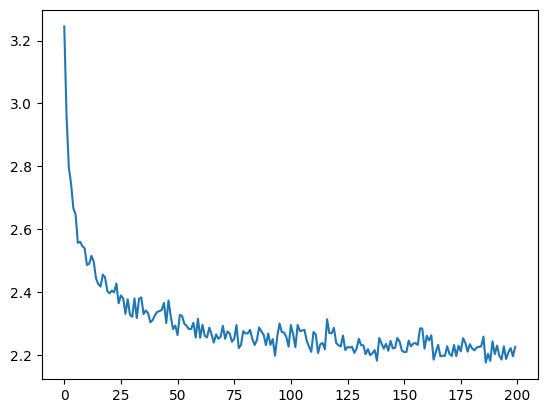

In [41]:
plt.figure()
plt.plot(all_losses)

In [42]:
max_length = 20

# Sample from a category and starting letter
def sample(model, category, start_letter='A'):
    with torch.no_grad():  # no need to track history in sampling
        category_tensor = categoryTensor(category)
        input = lineToTensor(start_letter)
        hidden = model.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = model(category_tensor, input[0], hidden)
            topv, topi = output.topk(1)
            topi = topi[0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = lineToTensor(letter)

        return output_name

# Get multiple samples from one category and multiple starting letters
def samples(model, category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(model, category, start_letter))

print('\033[1mRussian:\033[0m')
samples(rnn_model_gen, 'Russian', 'RUS')
print('')
print('\033[1mGerman:\033[0m')
samples(rnn_model_gen, 'German', 'GER')
print('')
print('\033[1mSpanish:\033[0m')
samples(rnn_model_gen, 'Spanish', 'SPA')
print('')
print('\033[1mChinese:\033[0m')
samples(rnn_model_gen, 'Chinese', 'CHL')

Russian:
Roveki
Urtovesky
Sakovakov

German:
Garter
Ester
Reite

Spanish:
Sala
Perta
Artanez

Chinese:
Che
Hange
Lie


In [43]:
# Train again
start = time.time()

for iter in range(1, n_iters + 1):
    category_tensor, input_line_tensor, target_line_tensor = randomTrainingExample1()
    category_tensor = torch.reshape(category_tensor, (1, n_categories))
    output, loss = train_gen(category_tensor, input_line_tensor, target_line_tensor, rnn_model_gen)
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 22s (5000 5%) 2.5184
0m 43s (10000 10%) 1.8069
1m 05s (15000 15%) 1.9931
1m 30s (20000 20%) 2.7976
1m 53s (25000 25%) 1.8432
2m 16s (30000 30%) 2.0556
2m 39s (35000 35%) 2.4330
3m 02s (40000 40%) 2.7864
3m 24s (45000 45%) 2.5393
3m 46s (50000 50%) 2.0874
4m 11s (55000 55%) 1.9846
4m 41s (60000 60%) 3.0657
5m 22s (65000 65%) 1.5931
5m 52s (70000 70%) 1.7501
6m 16s (75000 75%) 2.1503
6m 40s (80000 80%) 2.3760
7m 06s (85000 85%) 1.8213
7m 30s (90000 90%) 1.4893
7m 53s (95000 95%) 3.2847
8m 17s (100000 100%) 2.4225


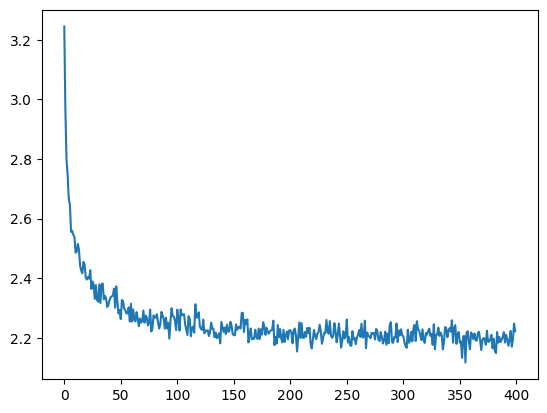

In [44]:
plt.figure()
plt.plot(all_losses)

In [45]:
max_length = 20
print('\033[1mRussian:\033[0m')
samples(rnn_model_gen, 'Russian', 'RUS')
print('')
print('\033[1mGerman:\033[0m')
samples(rnn_model_gen, 'German', 'GER')
print('')
print('\033[1mSpanish:\033[0m')
samples(rnn_model_gen, 'Spanish', 'SPA')
print('')
print('\033[1mChinese:\033[0m')
samples(rnn_model_gen, 'Chinese', 'CHL')

Russian:
Ridinik
Urintov
Shimov

German:
Grener
Ester
Rouren

Spanish:
Salo
Perter
Alara

Chinese:
Cha
Han
Lin
